In [1]:
%matplotlib inline
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from pathlib import Path
import random

In [2]:
import os
os.chdir("..") 

%run dataset.py
%run config.py
%run __init__.py
%run utils.py

In [3]:
root_path = Path("..")
val_data_path = os.path.join(DATA_PATH, "val")
train_data_path = os.path.join(DATA_PATH, "train")

In [4]:
if not os.path.isdir(val_data_path):
    create_val_split()

In [5]:
images_val_0 = os.listdir(os.path.join(val_data_path, "0_PNEUMONIA"))
images_train_0 = os.listdir(os.path.join(train_data_path, "0_PNEUMONIA"))

In [7]:
len(images_val_0)

350

In [8]:
len(images_train_0)

3525

In [9]:
images_val_1 = os.listdir(os.path.join(val_data_path, "1_NORMAL"))
images_train_1 = os.listdir(os.path.join(train_data_path, "1_NORMAL"))

In [10]:
len(images_val_1)

350

In [11]:
len(images_train_1)

991

In [12]:
train_dataset = PneumoniaDetectionDataset(split="train")
val_dataset = PneumoniaDetectionDataset(split="val")
test_dataset = PneumoniaDetectionDataset(split="test")

In [13]:
eval_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=2,
    shuffle=True,
)

In [14]:
for item in train_dataset:
    break
image, label, original_image = item

In [15]:
image.shape

torch.Size([3, 224, 224])

In [16]:
label

0

In [17]:
def show(tensor, label):
    fig = plt.figure(figsize=(8, 4))

    plt.imshow(tensor.permute(1, 2, 0))
    plt.title(classes[label])

In [18]:
classes = train_dataset.dataset.classes
classes

['0_PNEUMONIA', '1_NORMAL']

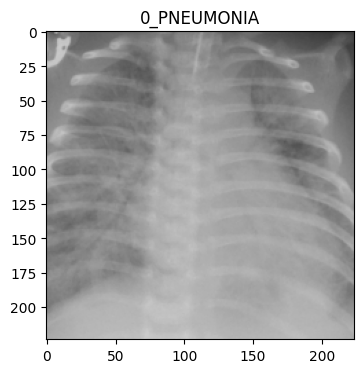

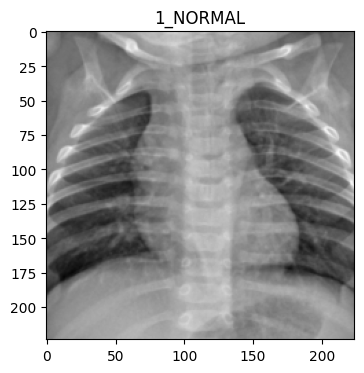

In [19]:
show(train_dataset[0][0], train_dataset[0][1])
show(train_dataset[4000][0], train_dataset[4000][1])

In [20]:
def show_classes(dataset):
    labels = []
    for data in dataset:
        if(data[1] == 0):
            labels.append("Pneumonia")
        else:
            labels.append("Normal")
    sns.set_style('darkgrid')
    sns.countplot(labels)    

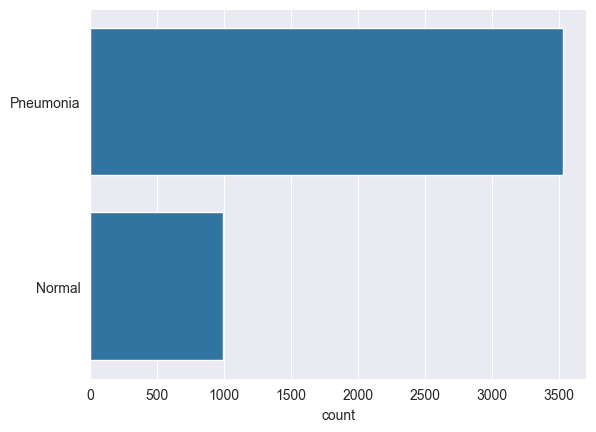

In [21]:
show_classes(train_dataset)

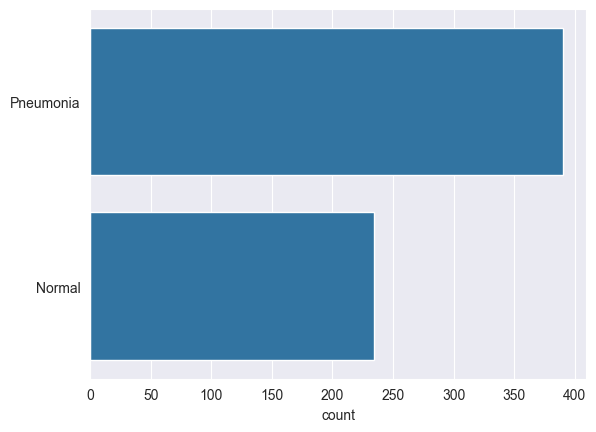

In [22]:
show_classes(test_dataset)